In [5]:
conda install -c conda-forge textblob

Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\acer\Anaconda3

  added / updated specs:
    - textblob


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    certifi-2019.3.9           |           py37_0         149 KB  conda-forge
    conda-4.8.3                |   py37hc8dfbb8_1         3.1 MB  conda-forge
    conda-package-handling-1.6.0|   py37h702c6c1_2         691 KB  conda-forge
    python_abi-3.7             |          1_cp37m           4 KB  conda-forge
    textblob-0.15.3            |             py_0         595 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         4.5 MB

The following NEW packages will be INSTALLED:

  conda-package-han~ conda-forge/win-64::conda-package-handling-1.6.0-py37h702c6c1_2
  python_abi         conda-forge/win-64::python_ab



==> WARNING: A newer version of conda exists. <==
  current version: 4.6.11
  latest version: 4.8.3

Please update conda by running

    $ conda update -n base -c defaults conda


'ET' is not recognized as an internal or external command,
operable program or batch file.


In [1]:
from textblob import TextBlob

In [2]:
review = 'Camera quality is not very good'
review1 = 'camera have excellent features'

In [3]:
analysis = TextBlob(review1) 

In [4]:
analysis.polarity

1.0

In [7]:
conda install -c conda-forge tweepy

Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\acer\Anaconda3

  added / updated specs:
    - tweepy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    blinker-1.4                |             py_1          13 KB  conda-forge
    oauthlib-3.0.1             |             py_0          82 KB  conda-forge
    pyjwt-1.7.1                |             py_0          17 KB  conda-forge
    requests-oauthlib-1.3.0    |     pyh9f0ad1d_0          21 KB  conda-forge
    tweepy-3.9.0               |     pyh9f0ad1d_0          28 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         161 KB

The following NEW packages will be INSTALLED:

  blinker            conda-forge/noarch::blinker-1.4-py_1
  oauthlib           conda-forge/noarch::oauthlib-3.0.1-py_0
  pyjwt            

In [8]:
import re 
import tweepy 
from tweepy import OAuthHandler  # twitter app authentication
from textblob import TextBlob 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [15]:
consumer_key = 'jv3qjuOil2qzjIeHA7Myu45oW'
consumer_secret = 'kJAcdUjhC0SFc8BmEivCHYzeFopLkoNZiCS9dbRTtIQsSSQOIt'
access_token = '720929143-z32ICi6B9Jx53dara3SMxjJyQyMRNTndJaslnzon'
access_token_secret = 'JjdvOEAALwsaffHAlvOchWhnxHphVVjwwPz346edFNS2i'

In [16]:
# attempt authentication 

# create OAuthHandler object 
auth = OAuthHandler(consumer_key, consumer_secret) 
    
# set access token and secret 
auth.set_access_token(access_token, access_token_secret) 
    
# create tweepy API object to fetch tweets 
api = tweepy.API(auth,wait_on_rate_limit=True) 

In [17]:
# 1. removing @username
# 2. tabs 
# 3. non words and other spaces
def clean_tweet(tweet): 
    ''' 
        Utility function to clean tweet text by removing links, special characters 
        using simple regex statements. 
    '''
    return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", "", tweet).split()) 

In [18]:
# Using text blob from above, we calculate the polarity score
# textblob has a corpus of positive, negative and neutral words
# It checks for the presence of these words in the document and calculates the overall
# polarity

def get_tweet_sentiment(tweet): 
    ''' 
    Utility function to classify sentiment of passed tweet 
    using textblob's sentiment method 
    '''
    # create TextBlob object of passed tweet text 
    analysis = TextBlob(clean_tweet(tweet)) 
    # set sentiment 
    if analysis.sentiment.polarity > 0: 
        return 'positive'
    elif analysis.sentiment.polarity == 0: 
        return 'neutral'
    else: 
        return 'negative'

In [89]:
# empty list to store parsed tweets 
tweets = [] 

# call twitter api to fetch tweets 
# count = 20
# The number of tweets to return per page, up to a maximum of 100. 
# Defaults to 15.
# This restriction is due to a security update from the Twitter API
# We will get rid of this limitation using the new 
# tweepy.Cursor() method

#fetched_tweets = api.search(q = "chidambaram", count = 100)
fetched_tweets=tweepy.Cursor(api.search,q="Binod").items(100)

# parsing tweets one by one 
for tweet in fetched_tweets: 
    # empty dictionary to store required params of a tweet 
    parsed_tweet = {} 

    # saving text of tweet 
    parsed_tweet['text'] = tweet.text

    
    # saving sentiment of tweet 
    parsed_tweet['sentiment'] = get_tweet_sentiment(tweet=clean_tweet(tweet.text)) 

    # appending parsed tweet to tweets list 
    if tweet.retweet_count > 0: 
        # if tweet has retweets, ensure that it is appended only once 
        if parsed_tweet not in tweets: 
            tweets.append(parsed_tweet) 
    else: 
        tweets.append(parsed_tweet) 

In [91]:
len(tweets)

100

In [92]:
tweets[0:5]

[{'text': 'Yeh binod kon hai https://t.co/qUFFZXgtki', 'sentiment': 'neutral'},
 {'text': '@innerchildjoo binod', 'sentiment': 'neutral'},
 {'text': "Can y'all tell me who is binod?😏 https://t.co/RnF0Bske4i",
  'sentiment': 'neutral'},
 {'text': '#binod #mickey1702 #meme #memes #india #indianmemes\nBinod kon hai? 😂 https://t.co/8LR0kLoLbB',
  'sentiment': 'neutral'},
 {'text': 'RT @thewittydoctor_: Binod is a medical student 😯\n#medtwitter https://t.co/y9BUmMOnQh',
  'sentiment': 'neutral'}]

In [93]:
# picking positive tweets from tweets 
ptweets = [tweet for tweet in tweets if tweet['sentiment'] == 'positive'] 
# percentage of positive tweets 
print("Positive tweets percentage: {} %".format(100*len(ptweets)/len(tweets))) 

Positive tweets percentage: 15.0 %


In [94]:
# picking negative tweets from tweets 
ntweets = [tweet for tweet in tweets if tweet['sentiment'] == 'negative'] 
# percentage of negative tweets 
print("Negative tweets percentage: {} %".format(100*len(ntweets)/len(tweets))) 

Negative tweets percentage: 7.0 %


In [95]:
# percentage of neutral tweets 
neutweets =[tweet for tweet in tweets if tweet['sentiment'] == 'neutral'] 
print("Neutral tweets percentage: {} %".format(100*(len(tweets) - len(ntweets) - len(ptweets))/len(tweets))) 

Neutral tweets percentage: 78.0 %


In [96]:
df_tweets_cnt = pd.DataFrame(pd.concat([pd.Series(len(ptweets)), pd.Series(len(ntweets)), pd.Series(len(neutweets))],axis=0 ))
df_tweets_cnt.set_index(pd.Series(['ptweets', 'ntweets', 'neutral_tweets']), inplace=True)
print(df_tweets_cnt)

                 0
ptweets         15
ntweets          7
neutral_tweets  78


In [97]:
# printing first 10 positive tweets 
print("\n\nPositive tweets:") 
for tweet in ptweets[:10]: 
    print(clean_tweet(tweet['text'])) 



Positive tweets:
RT Smile for the cameras You just became a trend binod
Thanks
ItsViral Police departments Paytm Tinder add smart twist to bizarrely hilarious Binod Twitter trend
RT asimsquad Just want ro say a magical word BINODDilKoMaineDiKasamTeaser
He is responsible for trending binod
RT Dear binod we hope your name is not your online password Its pretty viral change it now OnlineSafety
RT Rise We just received a confirmed participation from Binod Damn bahadurikosalaam riseup india
RT Dear binod we know you have gone very viral But your safety is important corona is more famous than you so stay home
Binod spotted for real this time binod
Paytm new tagline Binod karo


In [98]:
# printing first 10 negative tweets 
print("\n\nNegative tweets:") 
for tweet in ntweets[:10]: 
    
    print(tweet['text']) 



Negative tweets:
@faizy_nated Who is that bloody binod😑
RT @RahulTy53232810: #MumbaiPolice has time and interest to react on #binod but are not capable to investigate the case of #SushantSinghRaj…
#MumbaiPolice has time and interest to react on #binod but are not capable to investigate the case of… https://t.co/mbyMWAArdC
@TheRatanRoyal ☑️````````````````````````````````````````````````1% of people are addicted to exercise.
@iamharshbeniwal @SlayyPoint Sahi Bola apne mere BHI subscribers bol rahe hai ke binod ke uppar video banao
@SoTheyShudSpeak @SlayyPoint That's really sad Binod. Hope everyone gets to know.
@swwapniljoshi It all started when a video about weird comments was uploaded on the YouTube channel Slayy Point. Ca… https://t.co/YZsq6YbSRq


In [99]:
# printing first 10 negative tweets 
print("\n\nnuetral_tweets:") 
for tweet in neutweets[:10]: 
    print(tweet['text']) 



nuetral_tweets:
Yeh binod kon hai https://t.co/qUFFZXgtki
@innerchildjoo binod
Can y'all tell me who is binod?😏 https://t.co/RnF0Bske4i
#binod #mickey1702 #meme #memes #india #indianmemes
Binod kon hai? 😂 https://t.co/8LR0kLoLbB
RT @thewittydoctor_: Binod is a medical student 😯
#medtwitter https://t.co/y9BUmMOnQh
Ab jake mila gaya apna naam comment krne wala Binod
#binod #binodmemes #BinodArmy #Binodians https://t.co/wCHjsUtyLd
RT @himanshkohli: I hope all of you are having a #binod-ful day. 😂😂
#BinodBewafaHai
RT @mr_invincible__: #binod fans hit rt

#DilKoMaineDiKasamTeaser
Bro jinni importance binod ko mili hai utni kabhi mujhay bhi nahi mili🙄😂😂😂😂
who's binod??? educate me pleaseee


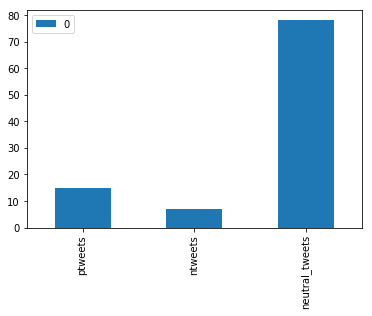

In [100]:
df_tweets_cnt.plot(kind='bar')